In [34]:
## Vanishing Gradient Issue can be detected using 2 ways
## 1. Observing the loss values, if No change then issue of Vanishinig Gradient
## 2. Observing the weights old and new weigths after compiling, if No change then Vanishing Gradient Issue

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [36]:
## Creating a Classificaiton Dataset

x, y = make_moons(n_samples = 250, noise = 0.05, random_state=10 )

In [37]:
x

array([[ 0.07817062,  1.01078238],
       [ 0.14395651,  0.39773011],
       [ 0.05873797,  1.00999408],
       [ 0.16888773, -0.07181786],
       [-0.82223785,  0.34678687],
       [-1.02444326,  0.19608442],
       [ 1.2289096 , -0.5037775 ],
       [-0.70269356,  0.76707971],
       [ 1.69798069, -0.16895002],
       [ 0.31616766,  0.98279836],
       [ 0.39784647, -0.2365455 ],
       [ 0.85485805, -0.52286561],
       [ 1.96545163,  0.29067961],
       [ 1.69921842, -0.35711428],
       [ 0.75056777,  0.50987914],
       [ 1.85706753, -0.09652444],
       [-0.04987501,  0.94523158],
       [ 0.20572911, -0.07586066],
       [ 1.48653026, -0.41220662],
       [-0.65698323,  0.76582487],
       [ 0.01858943,  1.00935161],
       [ 1.93093368,  0.21015622],
       [ 0.03667073,  0.23783456],
       [ 0.16379415, -0.07994554],
       [ 0.0705555 ,  0.47217128],
       [ 0.10501036,  0.93427279],
       [ 0.94457328,  0.24565085],
       [ 0.68514267,  0.65886351],
       [ 1.93853632,

In [38]:
y

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0])

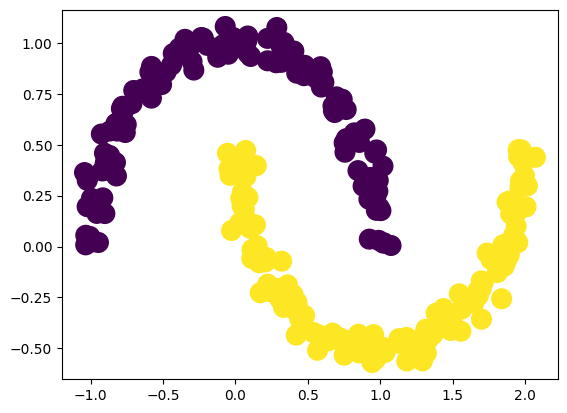

In [39]:
# Visualising the Data

plt.scatter(x[:,0], x[:,1], c=y ,s=200)
plt.show()

In [99]:
## Creating a complex DNN and checking the weight and loss using sigmoid as activation function

model = Sequential()

model.add(Dense(10, activation='sigmoid', input_dim=2))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))


In [100]:
## Compiling the model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:
# To get the old weight before model is trained

model.get_weights()

[array([[ 0.482503  , -0.30376717, -0.3938151 ,  0.0735783 , -0.5761489 ,
         -0.32915255, -0.46198946, -0.31120187, -0.02209675,  0.36588854],
        [ 0.12071395, -0.0410763 ,  0.36330146,  0.6391806 ,  0.2527172 ,
         -0.46860617,  0.22093767, -0.24538484,  0.27015823, -0.54191893]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.29992652, -0.46948227,  0.10419607, -0.48350617,  0.49577904,
         -0.04851484, -0.01075178,  0.53284335,  0.48705006,  0.42896968],
        [ 0.18191105,  0.16307265,  0.20063084,  0.35886145, -0.2849518 ,
         -0.30068365,  0.26390755,  0.25060642,  0.03697002,  0.5291705 ],
        [ 0.49785876,  0.23797357, -0.4259441 , -0.2811188 , -0.2436831 ,
          0.41364342, -0.11472586, -0.37315878,  0.06689763,  0.300254  ],
        [-0.4492351 ,  0.30768484,  0.36584747,  0.3289413 , -0.33948922,
         -0.47662476, -0.49134547, -0.069653  , -0.24324512, -0.4991799 ],
        [-0.04191

In [102]:
## Storing the Old weight for the 1st payer before Model Training

old_weight = model.get_weights()[0]

In [103]:
## Splitting the Data

x_train, x_test , y_train ,y_test = train_test_split(x,y,test_size=0.2, random_state=10)

In [104]:
## Fitting the Model for say 100 Epochs

history = model.fit(x_train, y_train , epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 11ms/step - loss: 0.6951 - accuracy: 0.5250
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6934 - accuracy: 0.5250
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6921 - accuracy: 0.5250
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6922 - accuracy: 0.5250
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6921 - accuracy: 0.5250
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6921 - accuracy: 0.5250
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6919 - accuracy: 0.5250
Epoch 8/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6919 - accuracy: 0.5250
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.5250
Epoch 10/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5250
Epoch 11/100
7/7 [======

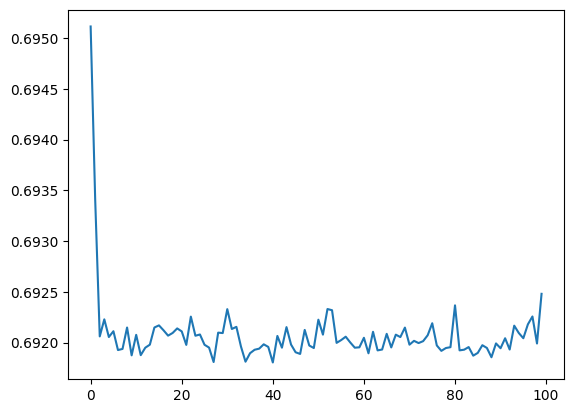

In [105]:
## Visualiing the Loss

plt.plot(history.history['loss'])

In [ ]:
## IF we can see the loss is not getting reduce and it stuck at 0.69 so this is case of Vanishing Gradient

In [57]:
## Storing New Weight for Layer 1 after Model is Train

new_weight = model.get_weights()[0]

In [58]:
old_weight

array([[-0.01339597, -0.21929646,  0.392039  ,  0.03588414,  0.08592796,
         0.36304837, -0.5577216 ,  0.13751823,  0.44848996,  0.63824266],
       [-0.31987366,  0.64877623, -0.228488  , -0.05202287,  0.15633398,
         0.49776703,  0.63448316, -0.5385983 ,  0.2848311 , -0.04407698]],
      dtype=float32)

In [59]:
new_weight

array([[-0.01529566, -0.22153777,  0.3963092 ,  0.05356846,  0.07550585,
         0.35672304, -0.5725154 ,  0.14062114,  0.44146213,  0.640994  ],
       [-0.31868505,  0.6502239 , -0.2317275 , -0.06466739,  0.1636559 ,
         0.5022218 ,  0.6465228 , -0.540661  ,  0.29034728, -0.04635327]],
      dtype=float32)

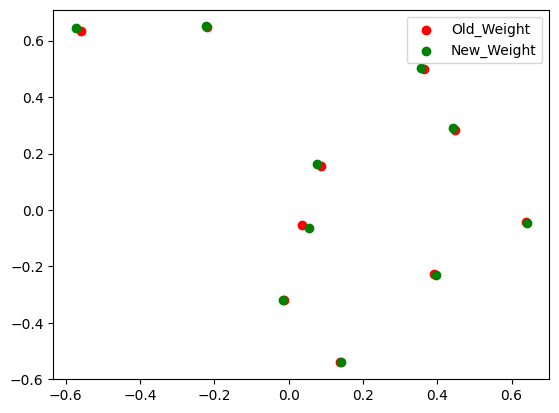

In [97]:
## Visualizaiton of Weights

plt.scatter(old_weight[0], old_weight[1], color = 'red', label= 'Old_Weight')
plt.scatter(new_weight[0],new_weight[1], color = 'green', label= 'New_Weight')
plt.legend()
plt.show()

In [68]:
## AS we can see they almost overlap each other Hence there is hardly any change so its a Vanishing Gradient Issue

# Handling Vanishing Gradient Problem

In [106]:
# 1. Reduce the Complexity fo the model i.e reduce the hidden layers.


model1 = Sequential()

model1.add(Dense(10, activation='sigmoid', input_dim=2))
model1.add(Dense(10, activation='sigmoid'))
model1.add(Dense(10, activation='sigmoid'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [107]:
## Stroring OLD Weight before the model is trained for Layer 1

old_weight1 = model1.get_weights()[0]

In [108]:
## Fitting the Model for 100 epochs

history1 = model1.fit(x_train, y_train , epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 5ms/step - loss: 0.6917 - accuracy: 0.5250
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5250
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6902 - accuracy: 0.5250
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6896 - accuracy: 0.5250
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6892 - accuracy: 0.5250
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6884 - accuracy: 0.5250
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.5250
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6875 - accuracy: 0.5250
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6871 - accuracy: 0.5250
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6868 - accuracy: 0.5250
Epoch 11/100
7/7 [===========

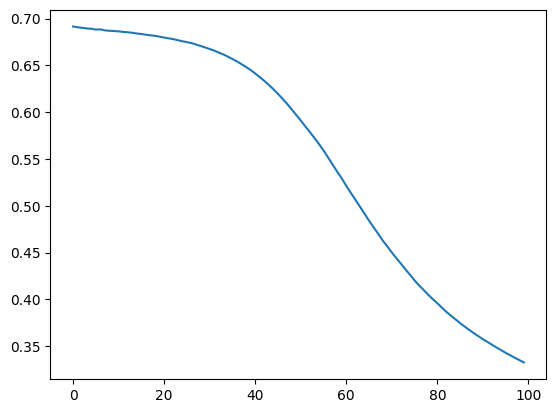

In [109]:
## Visualising the Loss

plt.plot(history1.history['loss'])

In [74]:
## Now we can observe the loss is reduce dreastically to 0.3839

In [110]:
## Calculating the New Weight

new_weight1 = model1.get_weights()[0]

In [111]:
old_weight1

array([[-0.07916611, -0.4049732 , -0.30711144, -0.5712793 , -0.1280868 ,
         0.61909384, -0.63716424,  0.50326556,  0.60449165,  0.43539983],
       [-0.6927161 ,  0.5459327 , -0.61053836,  0.083354  , -0.16412216,
         0.41134375, -0.16079342,  0.09873337, -0.51127905, -0.3382079 ]],
      dtype=float32)

In [112]:
new_weight1

array([[ 0.39530835, -0.85995674,  0.28177795, -0.96871465, -0.63715845,
         0.06791354, -0.9561933 ,  0.6635478 ,  0.9607754 ,  0.8407298 ],
       [-1.6448298 ,  1.6380564 , -1.6115648 ,  1.0732431 ,  0.8215219 ,
         1.3320781 ,  0.774767  , -0.62611336, -1.5147794 , -1.302147  ]],
      dtype=float32)

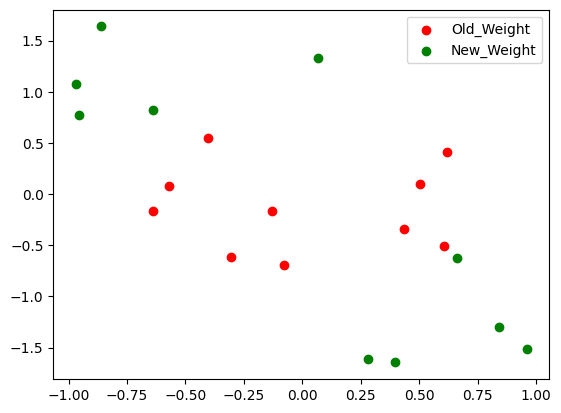

In [113]:
## Visualization for Weights

plt.scatter(old_weight1[0], old_weight1[1], color = 'red', label= 'Old_Weight')
plt.scatter(new_weight1[0],new_weight1[1], color = 'green', label= 'New_Weight')
plt.legend()
plt.show()

In [98]:
## Like we can see that All the weight are different

In [117]:
## 2. Changing the Activation Function to 'relu'

model2 = Sequential()

model2.add(Dense(10, activation='relu', input_dim=2))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss= 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

In [123]:
## Stroring OLD Weight before the model is trained for Layer 1

old_weight2 = model1.get_weights()[0]

In [119]:
## Fitting the Model for 100 epochs

history2 = model2.fit(x_train, y_train , epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 6ms/step - loss: 0.6935 - accuracy: 0.4750
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6927 - accuracy: 0.6100
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.7350
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6898 - accuracy: 0.7450
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6864 - accuracy: 0.8050
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6805 - accuracy: 0.8600
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6713 - accuracy: 0.8550
Epoch 8/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6556 - accuracy: 0.8750
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6335 - accuracy: 0.8800
Epoch 10/100
7/7 [==============================] - 0s 6ms/step - loss: 0.5988 - accuracy: 0.9000
Epoch 11/100
7/7 [===========

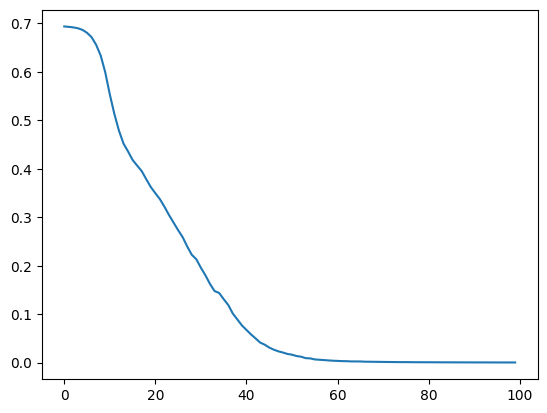

In [120]:
## Visualising the Loss

plt.plot(history2.history['loss'])

In [ ]:
## Loss has been reduce drastically

In [121]:
## ## Calculating the New Weight after Model is trained

new_weight2 = model2.get_weights()[0]

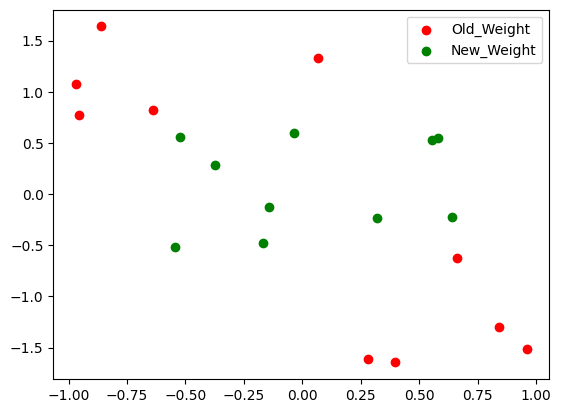

In [124]:
## Visualization

plt.scatter(old_weight2[0], old_weight2[1], color = 'red', label= 'Old_Weight')
plt.scatter(new_weight2[0],new_weight2[1], color = 'green', label= 'New_Weight')
plt.legend()
plt.show()

In [ ]:
## As we can see the weigths are totally scattered. Hence Vanishing Gradient Issue is handled.